In [1]:
from importlib import reload

In [2]:
import data_extraction

In [3]:
reload(data_extraction)

<module 'data_extraction' from '/home/atakanguney94/computer-vision-term-project/code/data_extraction.py'>

In [4]:
from data_extraction import *
import matplotlib.pyplot as plt

In [5]:
event_data = read_event_data("../data/bball_dataset_april_4.csv")
bbox_data = read_bboxes_data("../data/train_test_val_merged_detections_v2_ts_fixed.csv")

In [6]:
event_data.head()

,#YoutubeId,VideoWidth,VideoHeight,ClipStartTime,ClipEndTime,EventStartTime,EventEndTime,EventStartBallX,EventStartBallY,EventLabel,TrainValOrTest
0,-VcfnuYRhMU,490,360,2377375.000,2400664.933,2384913.177,2384972.840,0.376000,0.242884,layup failure,train
1,-XPEvIMe05A,490,360,1020386.033,1055254.200,1050422.765,1051247.263,0.582667,0.288425,layup success,test
2,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,-1.000,1261500.152,-1.000000,-1.000000,steal success,train
3,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1254131.452,1255201.545,0.698667,0.445920,other 2-pointer failure,train
4,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1241897.745,1243128.008,0.548000,0.352941,other 2-pointer failure,train


In [7]:
bbox_data.head(100)

,Youtube ID,Time,Top-left x,Top-left y,Width,Height,player-id
0,-KUYDYCwnOQ,518684833,0.3306,0.6090,0.0919,0.3400,person_0_00511477633
1,-KUYDYCwnOQ,518684833,0.3359,0.4698,0.0861,0.3161,person_6_00511477633
2,-KUYDYCwnOQ,518684833,0.4099,0.3784,0.0841,0.3056,person_14_00511477633
3,-KUYDYCwnOQ,518684833,0.5091,0.2676,0.0723,0.2190,person_10_00511477633
4,-KUYDYCwnOQ,518684833,0.5394,0.1466,0.0802,0.2086,person_26_00511477633
5,-KUYDYCwnOQ,518684833,0.5583,0.3206,0.0731,0.2786,person_27_00511477633
6,-KUYDYCwnOQ,518684833,0.6414,0.3155,0.0753,0.3058,person_22_00511477633
7,-KUYDYCwnOQ,518684833,0.7559,0.3020,0.0936,0.3316,person_31_00511477633
8,-KUYDYCwnOQ,518885033,0.3325,0.5086,0.0923,0.2667,person_6_00511477633
9,-KUYDYCwnOQ,518885033,0.3621,0.3478,0.0883,0.2645,person_14_00511477633


In [8]:
video_id = "4mrTUWACzoQ"

In [9]:
import os

In [10]:
len(os.listdir("../data/events"))

2389

In [11]:
events_paths = [os.path.join("../data/events", event) for event in os.listdir("../data/events") if video_id in event]

In [12]:
video_data = event_data[event_data["#YoutubeId"] == video_id]
video_data = video_data.sort_values(by="EventEndTime")

In [13]:
events_paths = sorted(events_paths)

In [14]:
len(events_paths)

72

In [15]:
event_map = create_events_map(event_data=video_data, events_paths_list=events_paths)

In [16]:
reverse_event_map = {value: key for key, value in event_map.items()}

In [17]:
video_bbox = bbox_data[bbox_data["Youtube ID"] == video_id]

In [18]:
event_bboxtimes_map = create_eventbboxtimes_map(video_bbox, event_map)

In [19]:
width, height = 490, 360

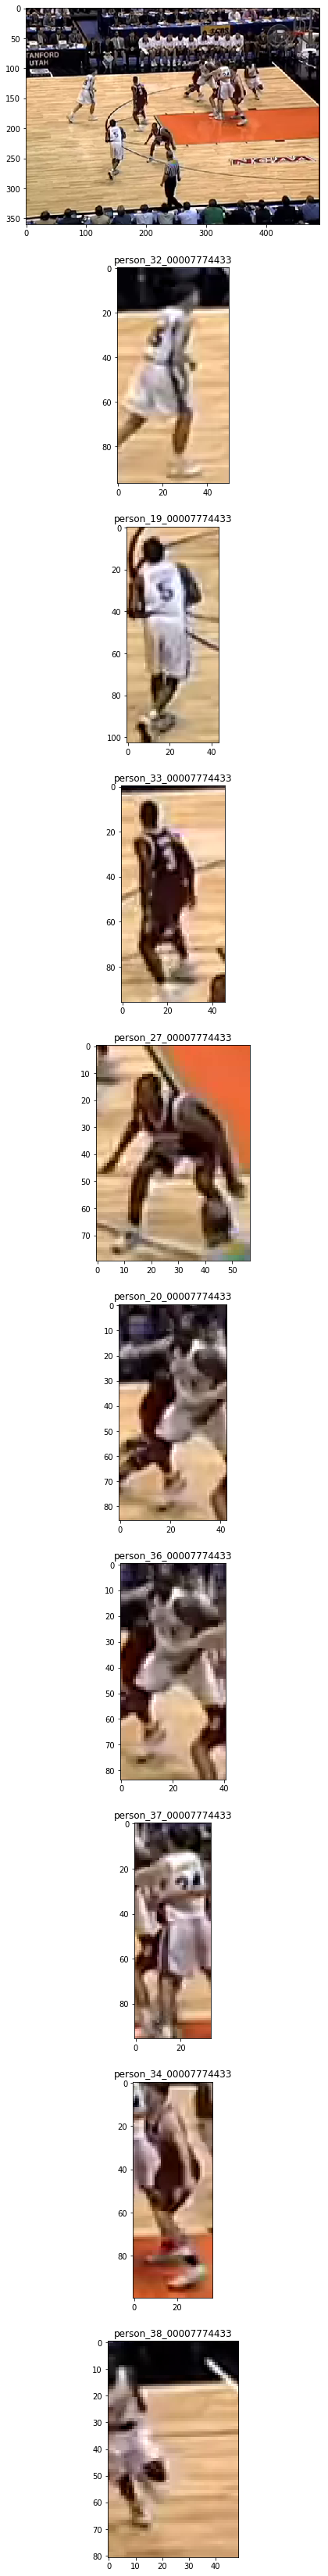

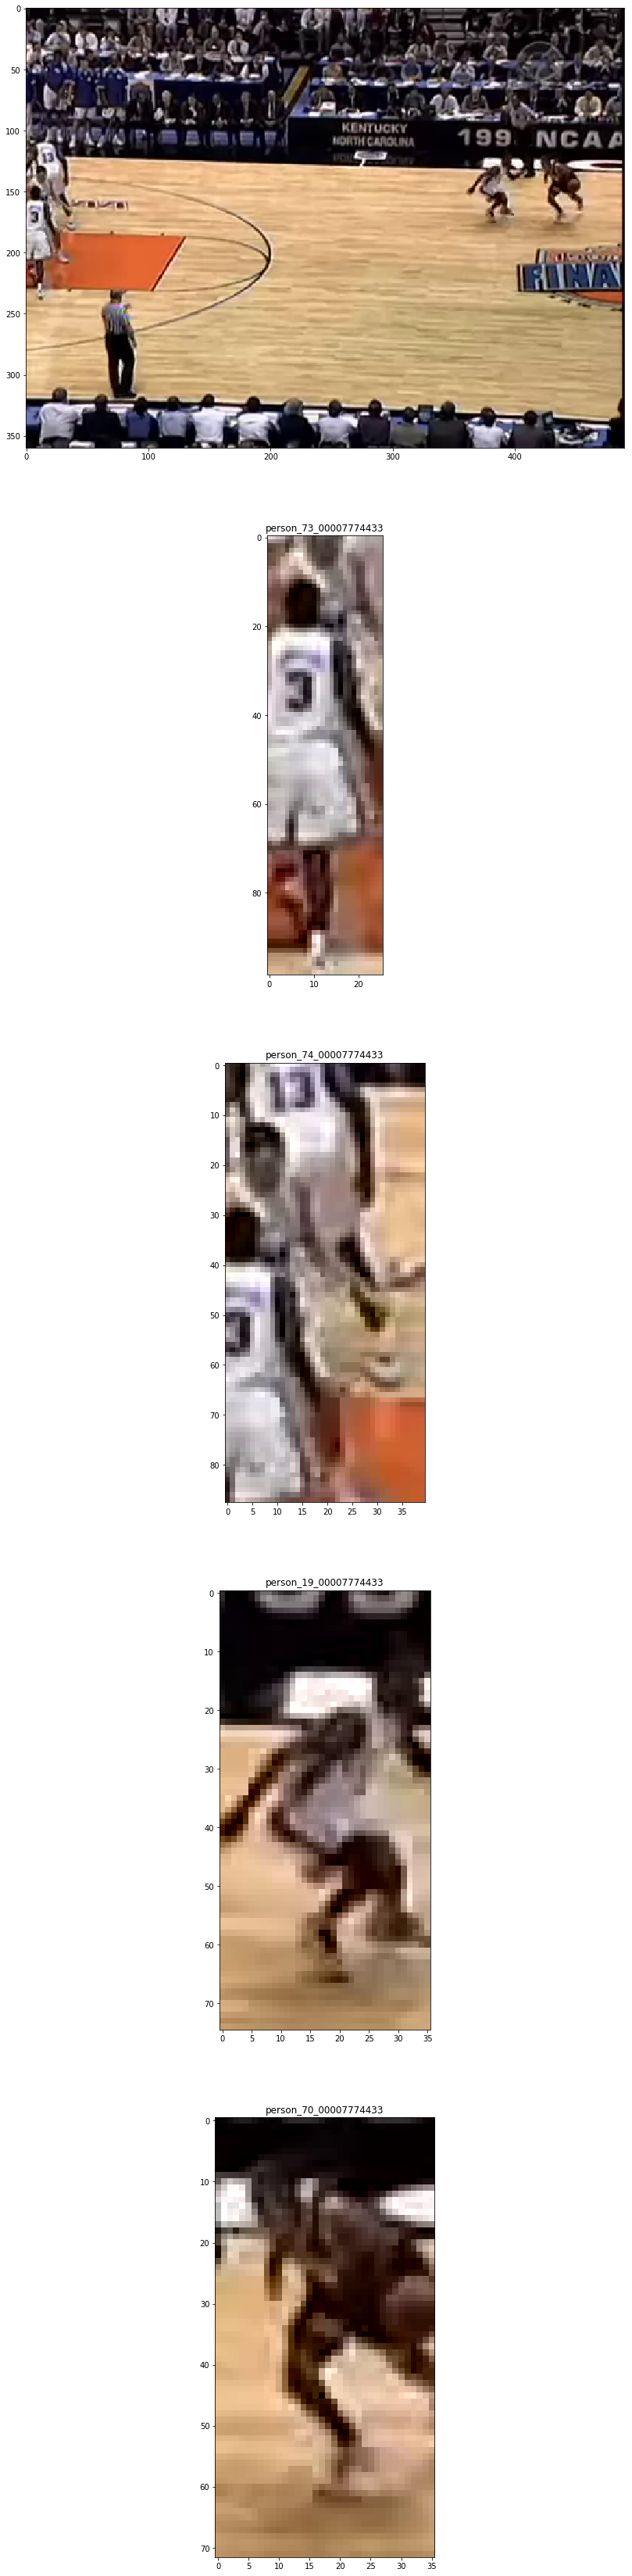

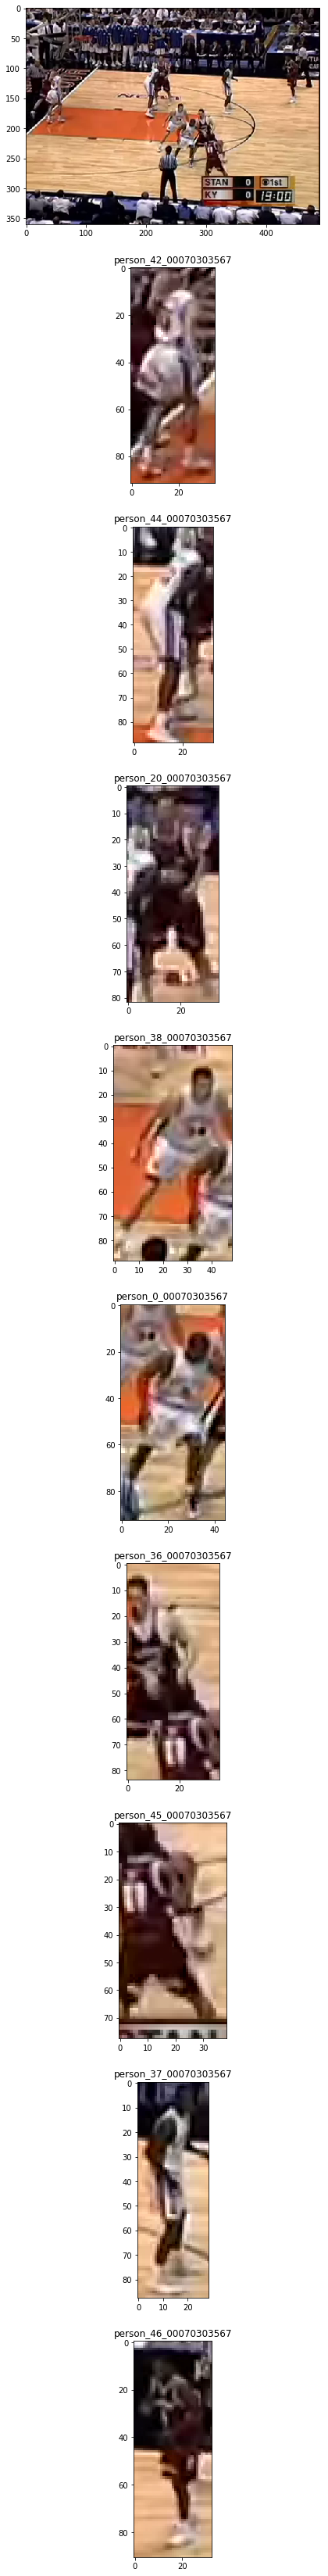

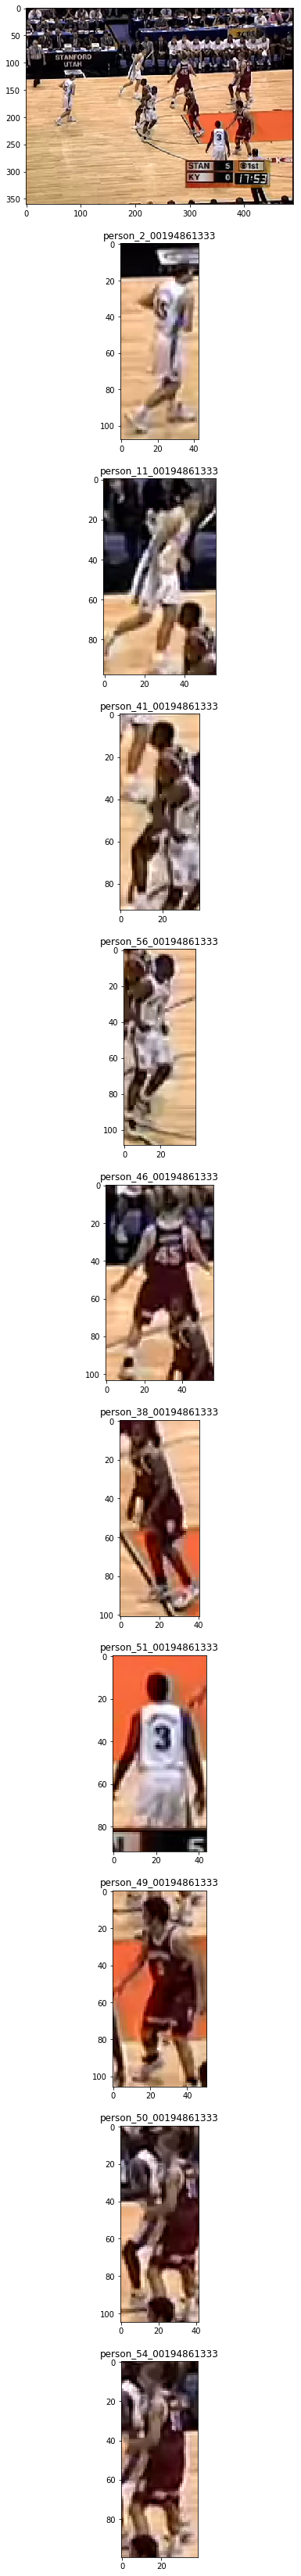

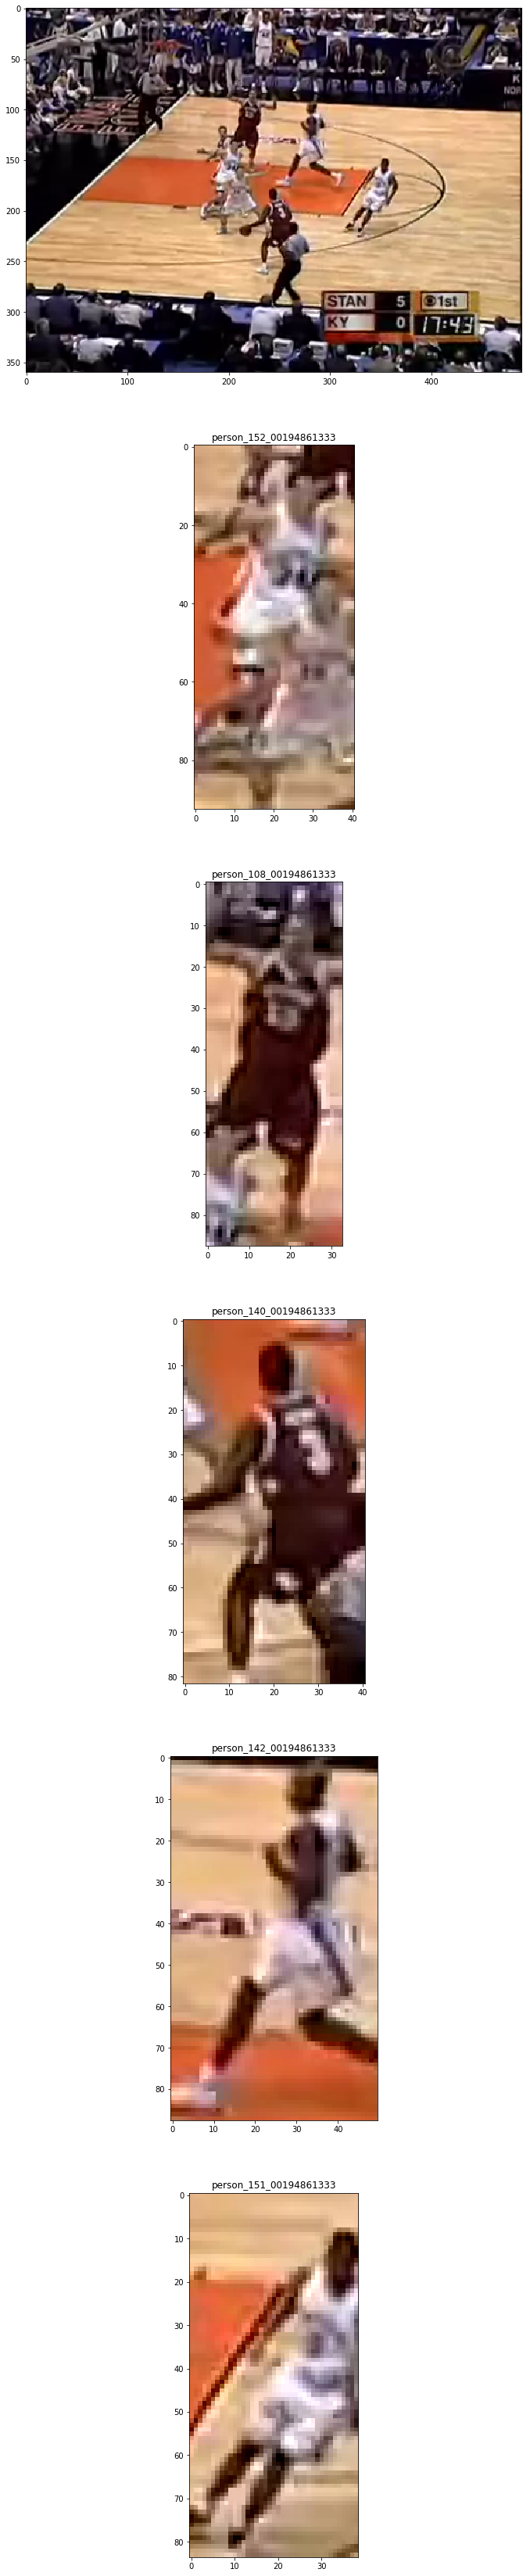

In [20]:
for idx in range(5):
    for frame, player_dict in extract_players_from_frames(events_paths[idx], event_bboxtimes_map, reverse_event_map[events_paths[idx]], video_bbox, width, height):
        fig, axes = plt.subplots(len(player_dict) + 1, 1, figsize=(60, 60))
        axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        for i, player_id in enumerate(player_dict):
            axes[i + 1].set_title(player_id)
            axes[i + 1].imshow(cv2.cvtColor(player_dict[player_id], cv2.COLOR_BGR2RGB))
        #n += 1
        #if n == 2:
        break

In [21]:
import tensorflow as tf
#import tensornets as nets

In [22]:
# boilerplate code
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

In [23]:
model_fn = 'tensorflow_inception_graph.pb'

# creating TensorFlow session and loading the model
graph = tf.Graph()
sess = tf.InteractiveSession(graph=graph)
with tf.gfile.FastGFile(model_fn, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
t_input = tf.placeholder(np.float32, name='input') # define the input tensor
imagenet_mean = 117.0
t_preprocessed = tf.expand_dims(t_input-imagenet_mean, 0)
tf.import_graph_def(graph_def, {'input':t_input})

Instructions for updating:
Use tf.gfile.GFile.


In [24]:
layers = [op.name for op in graph.get_operations() if op.type=='Conv2D' and 'import/' in op.name]
feature_nums = [int(graph.get_tensor_by_name(name+':0').get_shape()[-1]) for name in layers]

print('Number of layers', len(layers))
print('Total number of feature channels:', sum(feature_nums))


# Helper functions for TF Graph visualization

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualizing the network graph. Be sure expand the "mixed" nodes to see their 
# internal structure. We are going to visualize "Conv2D" nodes.
tmp_def = rename_nodes(graph_def, lambda s:"/".join(s.split('_',1)))
show_graph(tmp_def)

Number of layers 59
Total number of feature channels: 7548


In [25]:
layer = "softmax0_pre_activation"
def T(layer):
    '''Helper for getting layer output tensor'''
    return graph.get_tensor_by_name("import/%s:0"%layer)


In [26]:
T(layer)

<tf.Tensor 'import/softmax0_pre_activation:0' shape=(?, 1008) dtype=float32>

In [27]:
import cv2 as cv

In [28]:
np.array([cv.resize(frame, (224, 224)), cv.resize(frame, (224, 224))]).squeeze().shape

(2, 224, 224, 3)

In [29]:
t_obj = T(layer)

feature = sess.run(t_obj, {t_input: np.array([cv.resize(frame, (224, 224)), cv.resize(frame, (224, 224))]).squeeze()})



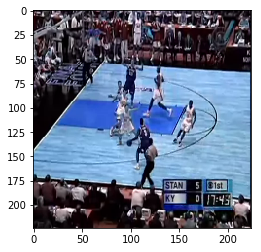

In [30]:
plt.imshow(cv.resize(frame, (224, 224)))

In [31]:
frame.shape

(360, 490, 3)

In [32]:
feature.shape

(2, 1008)

In [33]:
t_obj = T("avgpool0")

In [34]:
t_obj

<tf.Tensor 'import/avgpool0:0' shape=(?, ?, ?, 1024) dtype=float32>

In [35]:
fr = cv.resize(frame, (224, 224))

In [36]:
feature = t_obj.eval({t_input: fr.reshape(1, *fr.shape)})

In [37]:
feature.squeeze().shape

(1024,)

In [38]:
def preprocess_frame(frame, new_shape, kernel_size, sigma):
    """Preprocess frame befor feeding the network
    
    Parameters
    ==========
    frame: np.float32
        image
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    """
    blured = cv.GaussianBlur(frame, kernel_size, sigma)
    resized = cv.resize(blured, new_shape)
    
    return resized

In [39]:
import numpy as np

In [40]:
def extract_frame_features(frame, t_obj, new_shape, kernel_size, sigma):
    """Extract frame features from network object
    
    Paramters
    =========
    frame: np.float32
        image to be extracted features assumed in shape [image_height, image_width, 3]
    t_obj: tf.Tensor
        tensorflow object to be evaluated
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    """
    preprocessed = preprocess_frame(frame, new_shape, kernel_size, sigma)
    
    preprocessed = np.expand_dims(preprocessed, 0)
    
    features = t_obj.eval({t_input: preprocessed})
    
    return features.squeeze()

In [41]:
frame_data = np.array([fr, fr, fr, fr])

In [42]:
extract_frame_features(fr, t_obj, (224, 224), (5, 5), 0.1).shape

(1024,)

In [43]:
def extract_appeareance_player(player_region, t_obj, new_shape, kernel_size, sigma, pool_size, strides):
    """Extract appearance feature
    
    Parameters
    ==========
    player_region: np.float32
        image of player region
    t_obj: tf.Tensor
        tensorflow object to be evaluated
    new_shape: tuple
        target resized image
    kernel_size: tuple
        kernel size for gaussian blur
    sigma: float
        sigma for gaussian blur
    pool_size: tuple
        shape of the pool size for average pooling
    strides: tuple
        stride
    """
    
    # TODO: Implement region proposals
    preprocessed = preprocess_frame(player_region, new_shape, kernel_size, sigma)
    preprocessed = np.expand_dims(preprocessed, 0)
    
    t_avg_pool = tf.layers.average_pooling2d(t_obj, pool_size=pool_size, strides=strides, padding="VALID", name="avg_pool")
    features = t_avg_pool.eval({t_input: preprocessed})
    
    return features.reshape(-1)
    

In [44]:
t_obj = T("mixed4a")

In [45]:
t_obj.eval({t_input: np.expand_dims(fr, 0)}).shape

(1, 14, 14, 508)

In [46]:
pool_size = (7, 7)
strides = (7, 7)

In [47]:
t_avg_pool = tf.layers.average_pooling2d(t_obj, pool_size=pool_size, strides=strides, padding="VALID", name="avgpool")

In [48]:
avg_pool = sess.run(t_avg_pool, {t_input: np.expand_dims(fr, 0)})

In [49]:
avg_pool.reshape(-1).shape

(2032,)

In [50]:
player_dict

{'person_152_00194861333': array([[[130, 169, 215],
         [130, 169, 215],
         [132, 171, 217],
         ...,
         [  9,  10,  49],
         [  6,   7,  46],
         [  4,   5,  42]],
 
        [[129, 168, 214],
         [129, 168, 214],
         [130, 169, 215],
         ...,
         [  9,  10,  49],
         [  6,   7,  46],
         [  3,   4,  41]],
 
        [[126, 165, 211],
         [126, 165, 211],
         [126, 165, 211],
         ...,
         [  9,  10,  49],
         [  6,   7,  46],
         [  3,   4,  41]],
 
        ...,
 
        [[126, 177, 221],
         [122, 173, 217],
         [119, 170, 214],
         ...,
         [ 99, 130, 166],
         [ 83, 114, 150],
         [ 68,  99, 135]],
 
        [[150, 201, 245],
         [144, 195, 239],
         [137, 188, 232],
         ...,
         [ 66,  97, 133],
         [ 48,  79, 115],
         [ 27,  58,  94]],
 
        [[156, 209, 253],
         [152, 205, 249],
         [146, 199, 243],
         ...,
  

In [53]:
player_dict["person_152_00194861333"].shape

(93, 41, 3)

In [55]:
extract_appeareance_player(player_dict["person_152_00194861333"], t_obj, new_shape=(224, 224), kernel_size=(5, 5), sigma=0.1, pool_size=(7, 7), strides=(7, 7)).shape

(2032,)

In [87]:
# 4x4 pixels in cell, 8x8 cells in image
# 2x2 cells in a block 4x4 blocks in image
# 4x4x2x2x9
# 4x4 cells in image
# 2x2 blocks
# 2x2x2x2x9
# 1x1x2x2x9
# 1x1x1x1x9


In [57]:
def pyramid(img, scale, kernel_size, sigma, lower_bound=0):
    yield img
    height, width = img.shape[:2]
    height, width = height // scale, width // scale

    while height > lower_bound and width > lower_bound:
        img = cv.GaussianBlur(img, kernel_size, sigma, sigma)
        img = cv.resize(img, (width, height))
        yield img
        height, width = height // scale, width // scale

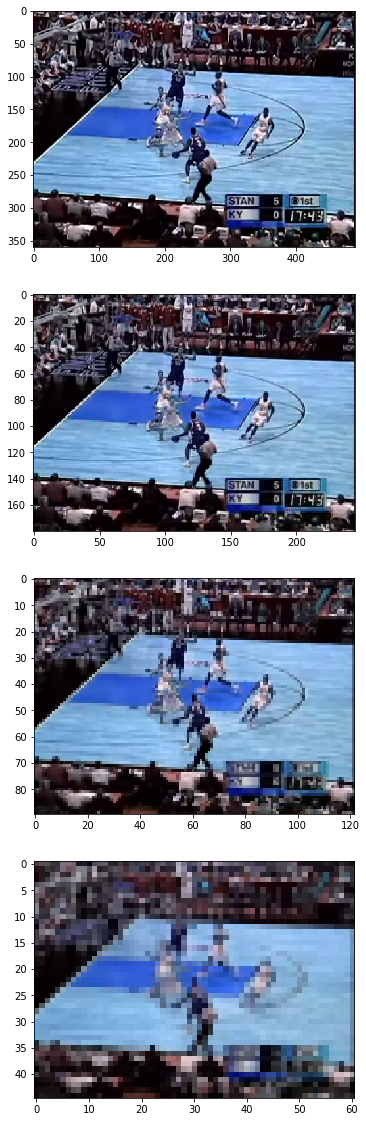

In [58]:
imgs = []
for img in pyramid(frame, 2, (5, 5), 0.1, 30):
    imgs.append(img)
    
fig, axes = plt.subplots(len(imgs), figsize=(20, 20))
for i, img in enumerate(imgs):
    axes[i].imshow(img)

In [60]:
player_dict["person_152_00194861333"].shape

(93, 41, 3)

In [62]:
player_region = player_dict["person_152_00194861333"]

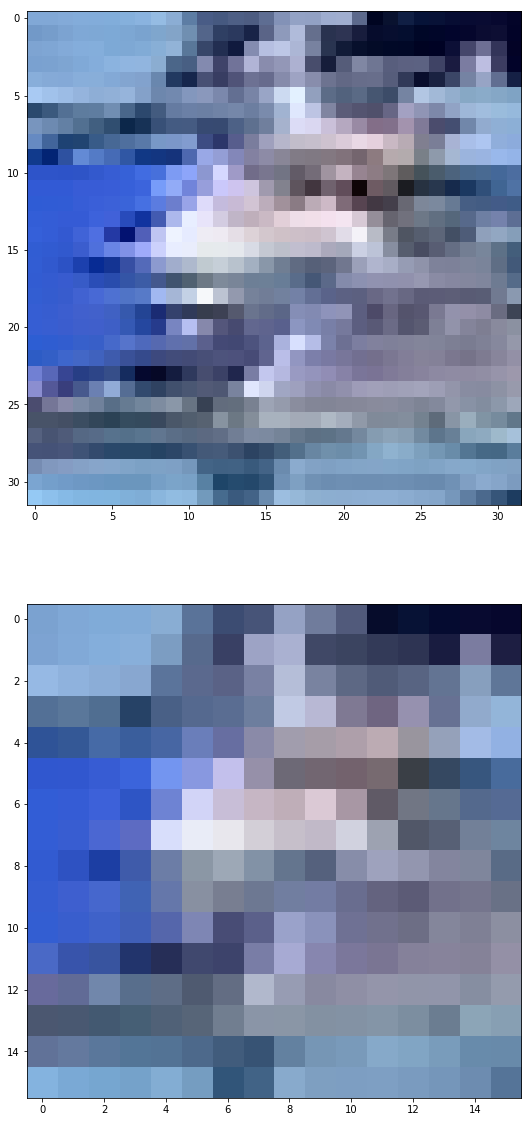

In [63]:
imgs = []
for img in pyramid(cv.resize(player_region, (32, 32)), 2, (5, 5), 0.1, 8):
    imgs.append(img)
    
fig, axes = plt.subplots(len(imgs), figsize=(20, 20))
for i, img in enumerate(imgs):
    axes[i].imshow(img)

In [64]:
from skimage import feature

In [65]:
(H, hogImage) = feature.hog(cv.resize(player_region, (32, 32)), orientations=18, pixels_per_cell=(4, 4),
    cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1",
    visualize=True)

In [66]:
H.shape

(1152,)

In [67]:
H2 = feature.hog(cv.resize(player_region, (16, 16)), orientations=18, pixels_per_cell=(4, 4),
    cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1")

In [68]:
H2.shape

(288,)

In [69]:
H2.shape[0] + H.shape[0]

1440

In [70]:
features = []
for img in pyramid(cv.resize(player_region, (32, 32)), 2, (5, 5), 0.1, 8):
    hog = feature.hog(img, orientations=18, pixels_per_cell=(4, 4), cells_per_block=(1, 1), transform_sqrt=True, block_norm="L1")
    features.append(hog)
    
np.hstack(features).shape


(1440,)

In [71]:
def extract_spatial_feature_from_player_region(player_region, shape, scale, kernel_size, sigma, lower_bound, orientations, pixels_per_cell, cells_per_block, block_norm):
    features = [feature.hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm=block_norm) for img in pyramid(cv.resize(player_region, shape), scale, kernel_size, sigma, lower_bound)]
    return np.hstack(features)

In [73]:
spatial_feature = extract_spatial_feature_from_player_region(player_region, (32, 32), 2, (5, 5), 0.1, 15, 18, (4, 4), (1, 1), "L1")

In [78]:
spatial_feature.shape

(1440,)

In [77]:
spatial_feature[spatial_feature == 0].shape

(693,)

In [79]:
def extract_localized_features_for_person(player_region, 
                                          layer="mixed4a", 
                                          network_shape=(224, 224), 
                                          kernel_size=(5, 5), 
                                          sigma=0.1, 
                                          pool_size=(7, 7), 
                                          strides=(7, 7), 
                                          local_shape=(32, 32), 
                                          scale=2, 
                                          lower_bound=15, 
                                          orientations=18,
                                          pixels_per_cell=(4, 4),
                                          cells_per_block=(1, 1),
                                          block_norm="L1"):
    """Extract localized feature for each player
    
    Parameters
    ==========
    player_region: np.float32
        img to be extracted features
    layer: str
        layer to be used from network
    network_shape: tuple
        image shape valid for network
    kernel_size: tuple
        gaussian kernel size
    sigma: float
        sigma to be used for gaussian blur
    pool_size: tuple
        pool size for spatial features
    strides: tuple
        stride for avg pooling
    local_shape: tuple
        shape for local spatial histograms
    scale: int
        scale factor for pyramid
    lower_bound: float
        to be used in pyramid
    orientations: int
        number of orientations used to calculate hog features
    pixels_per_cell: tuple
        pixels per cell
    cells_per_block: tuple
        cells per block
    block_norm: str
        block normalization method
    """
    
    t_obj = T(layer)

    appearence_feature = extract_appeareance_player(player_region,
                                                    t_obj,
                                                    new_shape=network_shape,
                                                    kernel_size=kernel_size,
                                                    sigma=sigma,
                                                    pool_size=pool_size,
                                                    strides=strides)
    
    spatial_feature = extract_spatial_feature_from_player_region(player_region,
                                                                 local_shape,
                                                                 scale,
                                                                 kernel_size,
                                                                 sigma,
                                                                 lower_bound,
                                                                 orientations,
                                                                 pixels_per_cell,
                                                                 cells_per_block,
                                                                 block_norm)
    
    return np.hstack([appearence_feature, spatial_feature])

In [80]:
%%timeit -n 1
extract_localized_features_for_person(player_region).shape

107 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
layer = "avgpool0"

In [105]:
T(layer)

<tf.Tensor 'import/avgpool0:0' shape=(?, ?, ?, 1024) dtype=float32>

In [147]:
events = []
for i in range(10):
    event = []
    for frame, player_dict in extract_players_from_frames(events_paths[i], event_bboxtimes_map, reverse_event_map[events_paths[i]], video_bbox, width, height):
        t_obj = T(layer)
        ft = extract_frame_features(frame=frame, kernel_size=(5, 5), new_shape=(224, 224), sigma=0.1, t_obj=t_obj)
        pt = []
        for player in player_dict:
            with tf.Session() as sess:
                pt.append(extract_localized_features_for_person(player_dict[player]))

        event.append((ft, pt))
    events.append(event)

In [163]:
layer

'avgpool0'

In [164]:
%%timeit -n 1 -r 1
event_0 = []
for frame, player_dict in extract_players_from_frames(events_paths[0], event_bboxtimes_map, reverse_event_map[events_paths[0]], video_bbox, width, height):
    t_obj = T(layer)
    ft = extract_frame_features(frame=frame, kernel_size=(5, 5), new_shape=(224, 224), sigma=0.1, t_obj=t_obj)
    pt = []
    for player in player_dict:
        with tf.Session() as sess:
            pt.append(extract_localized_features_for_person(player_dict[player]))

    event_0.append((ft, pt))

4min 30s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [150]:
import pickle

In [151]:
with open('10_events.pkl', 'wb') as f:
    pickle.dump(events, f)

In [167]:
from feature_extraction import extract_features

In [153]:
events_paths_list = ["events/event_0.webm"]

In [154]:
video_id

'-XPEvIMe05A'

In [156]:
event_data.head()

,#YoutubeId,VideoWidth,VideoHeight,ClipStartTime,ClipEndTime,EventStartTime,EventEndTime,EventStartBallX,EventStartBallY,EventLabel,TrainValOrTest
0,-VcfnuYRhMU,490,360,2377375.000,2400664.933,2384913.177,2384972.840,0.376000,0.242884,layup failure,train
1,-XPEvIMe05A,490,360,1020386.033,1055254.200,1050422.765,1051247.263,0.582667,0.288425,layup success,test
2,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,-1.000,1261500.152,-1.000000,-1.000000,steal success,train
3,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1254131.452,1255201.545,0.698667,0.445920,other 2-pointer failure,train
4,8Kg9jj9hzGQ,490,360,1227993.433,1273505.566,1241897.745,1243128.008,0.548000,0.352941,other 2-pointer failure,train


In [157]:
bbox_data.head()

,Youtube ID,Time,Top-left x,Top-left y,Width,Height,player-id
0,-KUYDYCwnOQ,518684833,0.3306,0.6090,0.0919,0.3400,person_0_00511477633
1,-KUYDYCwnOQ,518684833,0.3359,0.4698,0.0861,0.3161,person_6_00511477633
2,-KUYDYCwnOQ,518684833,0.4099,0.3784,0.0841,0.3056,person_14_00511477633
3,-KUYDYCwnOQ,518684833,0.5091,0.2676,0.0723,0.2190,person_10_00511477633
4,-KUYDYCwnOQ,518684833,0.5394,0.1466,0.0802,0.2086,person_26_00511477633


In [158]:
width, height

(490, 360)

In [50]:
from importlib import reload
import feature_extraction
reload(feature_extraction)

Instructions for updating:
Use tf.gfile.GFile.


/home/atakanguney94/.virtualenvs/ML/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<module 'feature_extraction' from '/home/atakanguney94/computer-vision-term-project/code/feature_extraction.py'>

In [53]:
event_feature = extract_features(event_data, bbox_data, video_id, events_paths_list, width, height)

NameError: name 'events_paths_list' is not defined

In [52]:
from feature_extraction import *